In [1]:
# This is a shortcut to avoid having to ever do plt.show()
%matplotlib inline

In [2]:
# This is the main plotting library we will use
import matplotlib.pyplot as plt
# And this is the pandas library we have been using for handling data
import pandas as pd

In [3]:
# Let's load a simple dataset and use the date as the index
df = pd.read_csv('data/stack-unstack-data.txt',delimiter=' ')
df.head()

,date,name,value
0,2000-01-03,A,0.469112
1,2000-01-04,A,-0.282863
2,2000-01-05,A,-1.509059
3,2000-01-03,B,-1.135632
4,2000-01-04,B,1.212112


In [4]:
# And now use the date as the index
df = df.set_index('date')
df.head()

,name,value
date,,
2000-01-03,A,0.469112
2000-01-04,A,-0.282863
2000-01-05,A,-1.509059
2000-01-03,B,-1.135632
2000-01-04,B,1.212112


In [5]:
# Let's pick some line width sizes for each of the values we want to plot
my_widths = {'A':10,'B':3,'C':5,'D':0.5}
print('The C values will be plotted with a line width of %d' % my_widths['C'])

The C values will be plotted with a line width of 5


### Option 1a: Using the `matplotlib.pyplot` module (`plt` namespace) directly

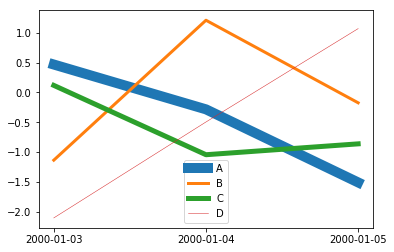

In [6]:
for letter in ['A','B','C','D']: # Iterate over each letter
    x = df[df['name']==letter]['value'] # Select the values (across all dates) for the given letter
    plt.plot(x,linewidth=my_widths[letter],label=letter) # Plot those values, with a size from the dict above
plt.legend(); # Add a legend

### Option 1b: Using the pandas wrapper to the same functionality

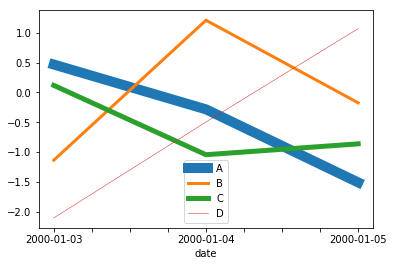

In [7]:
ax = None
for letter in ['A','B','C','D']: # Iterate over each letter
    x = df[df['name']==letter]['value']
    ax = x.plot(ax=ax,linewidth=my_widths[letter],label=letter) # Plot those values, with a size from the dict above
plt.legend(); # Add a legend

### Now let's rearrange the data and look at other options

In [8]:
df_newindex = df.reset_index().set_index(['date','name'])
df_newindex

,,value
date,name,
2000-01-03,A,0.469112
2000-01-04,A,-0.282863
2000-01-05,A,-1.509059
2000-01-03,B,-1.135632
2000-01-04,B,1.212112
2000-01-05,B,-0.173215
2000-01-03,C,0.119209
2000-01-04,C,-1.044236
2000-01-05,C,-0.861849


In [9]:
df_unstacked = df_newindex.unstack()['value']
df_unstacked

name,A,B,C,D
date,,,,
2000-01-03,0.469112,-1.135632,0.119209,-2.104569
2000-01-04,-0.282863,1.212112,-1.044236,-0.494929
2000-01-05,-1.509059,-0.173215,-0.861849,1.071804


### Option 2a: Operating on the whole dataframe at once

In [10]:
def set_labels_and_widths(df,widths):
    plt.legend(df.columns); # Add a legend
    for i,label in enumerate(df.columns):
        plt.gca().lines[i].set_linewidth(widths[label])

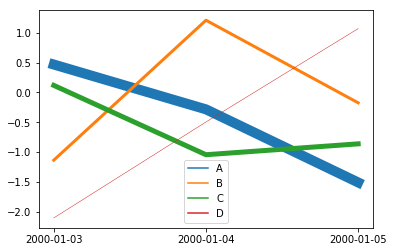

In [11]:
plt.plot(df_unstacked) # Plot those values, with a size from the dict above
set_labels_and_widths(df_unstacked,my_widths)

### Option 2b: Operating on the whole dataframe at once using the Pandas wrapper

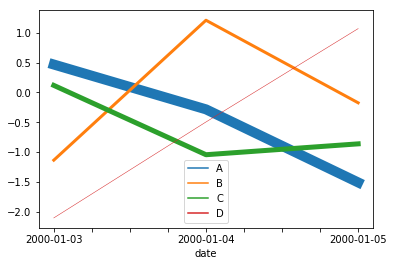

In [12]:
df_unstacked.plot() # Plot those values, with a size from the dict above
set_labels_and_widths(df_unstacked,my_widths)